<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><div align="center">This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.</div>

----

# Preparing the environment

## Graphics and plotting

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [2]:
import seaborn as sea

sea.set_style('dark')

In [3]:
import numpy as np

## SQL database connection

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code:

In [4]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement; we connect to the PostGreSQL DB named `s_cerevisiae` running on *this* host (shortcut: the null string after the `@` sign) as user `ubuntu`:

In [5]:
%sql postgresql://rmurri@/s_cerevisiae

u'Connected: rmurri@s_cerevisiae'

# Introduction to the `networkx` library

The `y2h_union` table lists interacting proteins (by name); a pair *(proteinA, proteinB)* appears in the table if *proteinA* interacts with *proteinB*.  Note that the "interacts with" relation need not be symmetric!

This describes a *directed* graph, where the proteins are the vertices and each interaction defines an edge.

Let us have a look at the `y2h_union` table:

In [6]:
%sql select * from y2h_union limit 3;

3 rows affected.


symbol_a,symbol_b
Q0085,YCR106W
TORF1,YCR106W
TORF19,YDR361C


In [7]:
data = %sql select * from y2h_union;

2929 rows affected.


In [8]:
data[:3]

[(u'Q0085', u'YCR106W'), (u'TORF1', u'YCR106W'), (u'TORF19', u'YDR361C')]

Alternatively, one can load the data from the `Y2H_union.tsv` file using only Python functions:

In [9]:
data = []
with open('Y2H_union.tsv', 'r') as stream:
    for line in stream:
        data.append(line.split())

In [10]:
data[:3]

[['MEL1', 'YJL092W'], ['Q0085', 'YCR106W'], ['TORF1', 'YCR106W']]

## Graph and network analysis with `networkx`

Python package [`networkx`](http://networkx.readthedocs.io/en/networkx-1.11/index.html) provides convenient functions to create a graph (directed or undirected) from a set of nodes or edges, and then [perform common graph-theoretical operations on it](http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.html), including computing a number of invariants.

However, `networkx` online reference, albeit quite comprehensive, does not document all available features. Python's `help()` command is your friend.

In [11]:
import networkx as nx

An *undirected* graph is built by calling the object constructor `networkx.Graph()` (use `networkx.DiGraph()` for a *directed* graph).  A graph is initially empty, edges and vertices must be added later on.

In [42]:
G = nx.Graph()

Each edge is defined by the pair of end vertices (order matters in the case of directed graphs).  Method `add_edges_from()` takes a list of vertex pairs and adds the corresponding vertices to the graph; vertices are added too, as needed.

In [43]:
G.add_edges_from(data)

The `.nodes()` method returns a list of graph vertices:

In [44]:
ns = G.nodes()

In [45]:
len(ns)

2018

Note that graph vertices can be *any* Python objects (with a few restrictions like not using a graph or a part of its data structures as a vertex of itself).

In [16]:
ns[:5]

['YLR268W', 'YJL155C', 'YBR255W', 'YFR027W', 'YJR122W']

`networkx` also provides a [few drawing functions](http://networkx.readthedocs.io/en/networkx-1.11/reference/drawing.html) but "its main goal is to enable graph analysis rather than perform graph visualization. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package."  Indeed, the basic `Graph.draw()` method ignores the currently-set Matplotlib style and does not allow any customization.  As recommended by `networkx` documentation, it is better to export the graph data and use a specialized visualization tool (e.g., [Graphviz](http://www.graphviz.org/)).

/opt/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

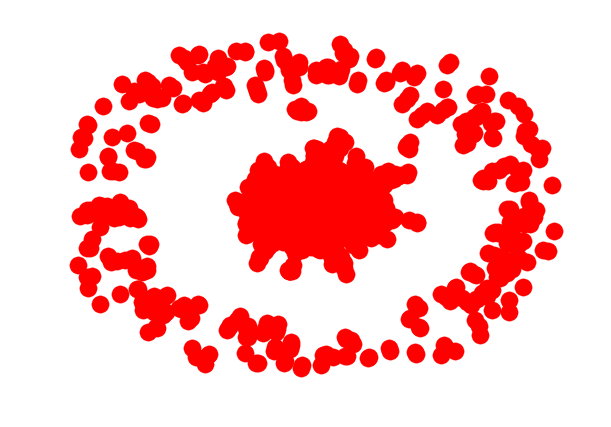

In [17]:
nx.draw(G)

### Computing graph invariants

#### Vertex degrees

`networkx` already provides functions for computing the (total, in-, or out-) degree of a vertex.  (In-degree and out-degree do of course only make sense for *directed* graphs.)

In [18]:
help(G.degree)

Help on method degree in module networkx.classes.graph:

degree(self, nbunch=None, weight=None) method of networkx.classes.graph.Graph instance
    Return the degree of a node or nodes.
    
    The node degree is the number of edges adjacent to that node.
    
    Parameters
    ----------
    nbunch : iterable container, optional (default=all nodes)
        A container of nodes.  The container will be iterated
        through once.
    
    weight : string or None, optional (default=None)
       The edge attribute that holds the numerical value used
       as a weight.  If None, then each edge has weight 1.
       The degree is the sum of the edge weights adjacent to the node.
    
    Returns
    -------
    nd : dictionary, or number
        A dictionary with nodes as keys and degree as values or
        a number if a single node is specified.
    
    Examples
    --------
    >>> G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
    >>> G.add_path([0,1,2,3])
    >>> G.

In [19]:
G.degree(u'YLR268W')

4

In- and out-degrees are only defined for *directed* graphs.

In [20]:
G.in_degree(u'YLR268W')

AttributeError: 'Graph' object has no attribute 'in_degree'

Note that **the return value of `.degree()` changes when passed a list of vertices** instead of just one.  This behavior is common to many `networkx` functions.

In [21]:
G.degree(['YLR268W', 'MEL1'])

{'MEL1': 1, 'YLR268W': 4}

Let us define a function to compute the average of the values returned by `networkx` functions. It comes in handy for computing some whole-graph quantities.

In [22]:
def avg(result):
    values = list(result.values())
    return sum(values) / len(values)

In [23]:
avg(G.degree(G.nodes()))

2

Let us package the procedure in a ready-to-use function.

In [24]:
def average_degree(G):
    """
    Return the average vertex degree of graph `G`.
    """
    return avg(G.degree(G.nodes()))

#### Vertex degree distribution

Seaborn's function [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html) can be used to plot the distribution of a bag of numbers. We need to extract the list of vertex degrees, i.e., the values in the mapping returned by `G.degree()`, to pass to `distplot`.  Also note that the list of degrees may include `0`, in case there are vertices not connected to any other node in the graph.

In [25]:
def plot_degree_distribution(G):
    nodes = G.nodes()
    node_to_degree_map = G.degree(nodes)
    degrees = list(node_to_degree_map.values())
    sea.distplot(degrees)

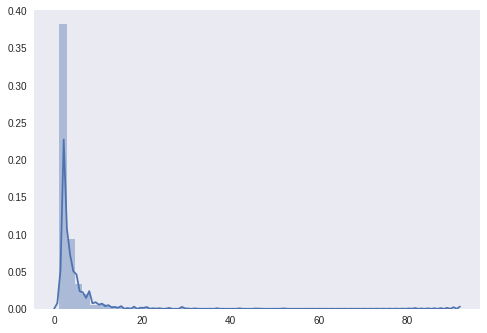

In [26]:
plot_degree_distribution(G)

#### Clustering coefficient

The `networkx.clustering` function returns the clustering coefficient of all vertices (by default) or a specified set of vertices (if explicitly given).

In [27]:
help(nx.clustering)

Help on function clustering in module networkx.algorithms.cluster:

clustering(G, nodes=None, weight=None)
    Compute the clustering coefficient for nodes.
    
    For unweighted graphs, the clustering of a node `u`
    is the fraction of possible triangles through that node that exist,
    
    .. math::
    
      c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},
    
    where `T(u)` is the number of triangles through node `u` and
    `deg(u)` is the degree of `u`.
    
    For weighted graphs, the clustering is defined
    as the geometric average of the subgraph edge weights [1]_,
    
    .. math::
    
       c_u = \frac{1}{deg(u)(deg(u)-1))}
            \sum_{uv} (\hat{w}_{uv} \hat{w}_{uw} \hat{w}_{vw})^{1/3}.
      
    The edge weights `\hat{w}_{uv}` are normalized by the maximum weight in the
    network `\hat{w}_{uv} = w_{uv}/\max(w)`.
    
    The value of `c_u` is assigned to 0 if `deg(u) < 2`.
    
    Parameters
    ----------
    G : graph
    
    nodes : container of nodes, o

Let us grab the clustering coefficient of all vertices in the graph; this of course takes more and more time as the number of vertices and edges in the graph increases.

In [28]:
cc = nx.clustering(G)

In the Yeast Interactome network, only relatively few vertices (proteins) are strongly clustered:

In [29]:
["{0}: {1}".format(protein, coeff) for protein, coeff in cc.items() if coeff >= 0.5]

['YJR044C: 1.0',
 'YDR016C: 0.5',
 'YBR094W: 1.0',
 'YNR007C: 1.0',
 'YMR146C: 1.0',
 'YFL044C: 0.666666666667',
 'YGR040W: 0.5',
 'YPL065W: 1.0',
 'YGL192W: 1.0',
 'YPL105C: 1.0',
 'YCL033C: 1.0',
 'YOR230W: 1.0',
 'YNL334C: 1.0',
 'YDR261WB: 1.0',
 'YBR111C: 1.0',
 'YNL118C: 1.0',
 'YNL147W: 1.0',
 'YHR034C: 1.0',
 'YCL066W: 1.0',
 'YDL088C: 1.0',
 'YFR015C: 1.0',
 'YER146W: 0.5',
 'YGL061C: 0.5',
 'YMR227C: 1.0',
 'YDR378C: 1.0',
 'YJR039W: 1.0',
 'YLR399C: 1.0',
 'YPL002C: 1.0',
 'YOR007C: 1.0',
 'YMR096W: 0.733333333333',
 'YHR102W: 1.0',
 'YMR129W: 1.0',
 'YML062C: 1.0',
 'YMR298W: 0.666666666667',
 'YLR417W: 1.0',
 'YOR167C: 1.0',
 'YER128W: 1.0',
 'YGR010W: 0.666666666667',
 'YML031W: 1.0',
 'YKL032C: 1.0',
 'YDR477W: 0.666666666667',
 'YHR160C: 1.0',
 'YIL160C: 1.0',
 'YCR068W: 0.666666666667',
 'YOR158W: 0.666666666667',
 'YNL111C: 0.5',
 'YDR308C: 0.5',
 'YHL019C: 1.0',
 'YBL021C: 1.0',
 'YPL059W: 1.0',
 'YCL019W: 1.0',
 'YBR087W: 1.0',
 'YLR175W: 1.0',
 'YFL060C: 1.0',
 'YN

Indeed, the average clustering coefficient (CC of the graph) is quite low:

In [30]:
avg(cc)

0.046194001297365166

Let us package the procedure in a ready-to-use function.

In [31]:
def clustering_coefficient(G):
    """
    Return the clustering coefficient of graph `G`.
    """
    return avg(nx.clustering(G))

#### Characteristic path length

Computing the *characteristic path length* takes more Python code. There is no ready-made `networkx` algorithm for it, so we have to craft our own.

Start by computing the *shortest path length* connecting each pair of vertices.  Function `shortest_path_length` --not documented online, see `help(nx.shortest_path_length)`-- returns a nested Python `dict` mapping each vertex $v$ into a `dict`, each key of which is a vertex $u$ which can be reached from $v$ and the associated value is the length of the shortest path connecting $u$ to $v$.

This is probably best seen with an example.

In [46]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

In [32]:
%%time 

path_lengths = nx.shortest_path_length(G)

CPU times: user 2.7 s, sys: 200 ms, total: 2.91 s
Wall time: 2.89 s


In [33]:
print(path_lengths['YFL059W'])

{'YLR268W': 4, 'YJL155C': 4, 'YBR255W': 9, 'YFR027W': 4, 'YJR122W': 6, 'YLR244C': 6, 'YPL144W': 4, 'YBR135W': 3, 'YBR160W': 4, 'YDL238C': 4, 'YKL074C': 3, 'YNR067C': 5, 'YNL152W': 4, 'YKL063C': 4, 'YFL045C': 3, 'YFL010C': 2, 'YIL124W': 4, 'YJR044C': 4, 'YLR219W': 5, 'YNL054WB': 4, 'YKL183W': 4, 'YLR362W': 4, 'YKL052C': 4, 'YBR273C': 5, 'YHR025W': 2, 'YHR009C': 5, 'YOL034W': 2, 'YLR447C': 5, 'YGL237C': 4, 'YOL058W': 2, 'YDR016C': 4, 'YOL129W': 4, 'YHR130C': 5, 'YOL116W': 4, 'YGL071W': 4, 'YOR359W': 4, 'YNL239W': 2, 'YGR020C': 5, 'YNL288W': 3, 'YOR322C': 4, 'YAL046C': 4, 'YFR047C': 2, 'YIL106W': 8, 'YML127W': 6, 'YAL049C': 5, 'YLL042C': 6, 'YPL128C': 4, 'YJR093C': 5, 'YGR146C': 4, 'YOR062C': 5, 'YBR094W': 5, 'YHR112C': 2, 'YNR007C': 5, 'YDR527W': 4, 'YMR224C': 4, 'YLR011W': 3, 'YPR183W': 4, 'YDL073W': 5, 'YNL093W': 5, 'YOR391C': 2, 'YOL001W': 4, 'YDR059C': 5, 'YNL217W': 4, 'YKL204W': 6, 'YLR404W': 5, 'YFR024CA': 4, 'YIL013C': 3, 'YMR233W': 3, 'YDR421W': 4, 'YNR052C': 3, 'YHR032W': 4, 'YH

Given the structure of the nested mapping `path_lengths`, we know that `path_lengths[u][v]` is either an integer (length of shortest path from $u$ to $v$) or raises a `KeyError` exception (no path from $u$ to $v$).  We can then use a doubly nested loop to compute the characteristic path length:

In [34]:
%%time 

# compute the `characteristic path length`

nodes = G.nodes()

total_path_len = 0.0
connected_pairs = 0
for u in nodes:
    for v in nodes:
        try:
            total_path_len +=  path_lengths[u][v]
            connected_pairs += 1
        except KeyError:
            # no path from `u` to `v`
            pass

print ("Characteristic Path Length L={}".format(total_path_len / (len(nodes)*(len(nodes)-1))))
print ("Average Shortest Path Length L'={}".format(total_path_len / connected_pairs))
print

Characteristic Path Length L=3.73778335093
Average Shortest Path Length L'=5.60675629759

CPU times: user 1.83 s, sys: 0 ns, total: 1.83 s
Wall time: 1.84 s


Let us package the whole procedure in a single ready-to-use function.

In [35]:
def characteristic_path_length(G):
    """
    Return the characteristic path length of graph `G`.
    """
    path_lengths = nx.shortest_path_length(G)
    nodes = G.nodes()
    total_path_len = 0.0
    for u in nodes:
        for v in nodes:
            try:
                total_path_len +=  path_lengths[u][v]
            except KeyError:
                # no path from `u` to `v`
                pass
    return (total_path_len / (len(nodes)*(len(nodes)-1)))

----

## 1. Adjacency matrix

The *adjacency matrix* $A$ of a graph is defined as follows:

- rows and columns are indexed by graph vertices
- an entry $A_{uv}$ is 1 if $u$ and $v$ are directly connected by an edge, and 0 otherwise

Compute the 2nd power $A^2$; what do the entries of matrix $A^2$ represent?  

More in general, compute the $k$-th power $A^k$. what do its entries represent?

*(Hint: have a look at functions `networkx.adjacency_matrix`, the `.todense()` method of the returned matrix and `numpy.dot`)*

## 2. Different kinds of random graphs

`networkx` provides [functions for generating different types of graphs][1] / networks.  Create one instance of each of the following random graphs:

* An Erdös-Rényi graph with $n=50$ vertices and $p=0.25$ probabily of connecting two vertices
* A Watts-Strogatz graph (called Watts' $\beta$-model in the lectures) with $n=50$ vertices, each vertex connected with its $k=2$ nearest neighbors, and $p=\beta=0.25$ rewiring probability
* A Barabási-Albert graph, with $m=5$ initial vertices and $n=50$ final (total) vertices.

For each graph, draw the graph and plot the vertex degree distribution.

How do the graphs differ?

[1]: http://networkx.readthedocs.io/en/networkx-1.11/reference/generators.html

## 3. Analyze a real-world graph dataset

The `networkx` library provides also [I/O functions for importing and exporting graphs with various formats](http://networkx.readthedocs.io/en/networkx-1.11/reference/readwrite.html).

Use the `networkx.read_graphml()` function to read a graph from file `starred.graphml`; it contains a (subset of) data from the UZH Science Cloud storage backend.

Answer these questions:

- what are the vertices with the top 2 degrees?
- are these vertices connected by a path?
- is the graph connected?
- compute the average degree, clustering coefficient, and characteristic path length; does this graph resemble any of the graphs/networks we have seen so far?
- what do the connected subgraphs look like?

## 4. Play the "Kevin Bacon" game!

**Optional:** Dataset is large, computations can take a loooong time and possibly crash the IPython kernel if done too naively. 

Connect to the `imdb` database on this server; define a graph thusly:

- actors are vertices
- two vertices are connected if the corresponding actors have starred in a movie together.

Plot the number of actors at distance $n=1,2,3$ from Kevin Bacon (named `Kevin Bacon (I)` in the `actors_r` table).

Actors and movie data are available from database `imdb` in tables `movies_r`, `actors_r`, and `starring_r`.  (The `*_r` tables only contain data for movies from 1990 to 2000; there are also `movie`, `actors`, and `starring` tables with the full IMDB dump -- 10x as large!)

In [36]:
%sql postgresql://rmurri@/imdb

u'Connected: rmurri@imdb'

In [37]:
%sql SELECT * FROM actors_r LIMIT 3;

3 rows affected.


id,name
26,Michael 'babeepower' Viera
34,Joseph 'Byron' Sese
60,José 'El Francés'


In [38]:
%sql SELECT * FROM actors_r WHERE name = 'Kevin Bacon (I)';

1 rows affected.


id,name
116637,Kevin Bacon (I)


In [39]:
%sql SELECT * FROM movies_r LIMIT 3;

3 rows affected.


id,title,year
31,Mixing Nia,1998
46,Mariano Mison... NBI,1997
79,Alma gitana,1996


In [40]:
%sql SELECT * FROM starring_r LIMIT 5;

5 rows affected.


actor_id,movie_id
2096811,16423
2046273,16423
1220103,16423
1220100,16423
1186033,16423


## 5. Characteristics of families of random graphs

**Optional:** This exercise might require some Python programming experience!

Make a plot of the three graph quantities *average vertex degree*, *clustering coefficient*, and *characteristic path length* for Erdös-Rényi graphs with $n=100$ vertices and probabilty $p$ of connecting two vertices (x-axis) ranging from 0 to 0.3 in steps of $0.3/20 = 0.015$. 

Nor make the same plots for the following graph families:

* Watts-Strogatz (aka Watts $\beta$-model) with $n=100$ vertices, $k=2$ connection to nearest neoghbors, and $p$ (on the x-axis) as for ER graphs
* Barabási-Albert graphs with $n=100$ final vertices and $m=1,...,99$ initial vertices (x-axis)